In [1]:
#import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Make agumantation for picture
from tensorflow.keras.applications import MobileNetV2 #it,s look like VGG 16 / Pretrained model ==> 1000 Category ===>224 ,224 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # every input has a process 
from tensorflow.keras.preprocessing.image import img_to_array # transform image to array 
from tensorflow.keras.preprocessing.image import load_img  # load & read the image
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np 
import os  # Operaiting system



In [17]:
INIT_LR = 1e-4 #0.0001  ====> Learning rate
EPOCHS = 20  # Number of training
BS = 32  # Batch Size ==> every time i will enter 32 picture
DIRECTORY = r"D:\DL\Module 4\data"
CATEGORIES = ["with_mask" , "without_mask"]

In [18]:
print ("[INFO] I loading images... ")
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY,category)
    for image in os.listdir(path): # every thing you will found in this path give it to me and told me it's an image ge
        img_path = os.path.join(path,image)

        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        
        data.append(image)
        labels.append(category)

[INFO] I loading images... 


C:\Users\Abdulrhman Saleh\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
# perform one-hot encoding on the labels
lb = LabelBinarizer() # take all photo and make it  as a list
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY ) = train_test_split(data, labels, stratify = labels, test_size=0.20, random_state = 42)


In [5]:
#construct the training image  generatot  for data agumantation

aug = ImageDataGenerator(
rotation_range=20,   #  rotate the image  بيلف الصورة
zoom_range=0.15,   #Make a zoom 
width_shift_range=0.2, # Move image to the left
shear_range=0.15,
horizontal_flip=True,
fill_mode="nearest")

In [19]:
#Load the MobileNetV2 network, ensuring the head fc layer sets are let off 
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224,224,3)))  # Number 3 refers to the color 

C:\Users\Abdulrhman Saleh\AppData\Local\Temp\ipykernel_28420\945535152.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False,


In [20]:
#construct the head  of the model that will be placed  on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7 , 7))(headModel)
headModel = Flatten(name = "flatten")(headModel)
headModel = Dense(128, activation="relu") (headModel)
headModel = Dropout(0.5)(headModel)  # make a drop to reduce the features
headModel = Dense(2, activation="softmax")(headModel)

#place the head fc model om top of the base model(this will become the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [21]:
#Loop over all layers in base model and freeze them so they will not be update during the first 
#training process 
for layer in baseModel.layers:
    layer.trainable = False
    
#compile our model 
print("[info] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


[info] compiling model...


C:\Users\Abdulrhman Saleh\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [22]:
#train the head of the network
print("[info] training head...")
H = model.fit(
aug.flow(trainX, trainY, batch_size=BS),
steps_per_epoch=len(trainX)//BS,
validation_data=(testX,testY),
validation_steps=len(testX)//BS,
epochs = EPOCHS)

[info] training head...
Epoch 1/20


C:\Users\Abdulrhman Saleh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.8201 - loss: 0.4406 - val_accuracy: 0.9762 - val_loss: 0.0862
Epoch 2/20


C:\Users\Abdulrhman Saleh\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 1.0000 - loss: 0.0368 - val_accuracy: 0.9762 - val_loss: 0.0863
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9732 - loss: 0.0964 - val_accuracy: 0.9828 - val_loss: 0.0611
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.9828 - val_loss: 0.0607
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 773ms/step - accuracy: 0.9816 - loss: 0.0683 - val_accuracy: 0.9808 - val_loss: 0.0562
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accuracy: 0.9815 - val_loss: 0.0553
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 149s 778ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9841 - val_loss: 0.0484
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9841 - val_loss: 0.0487
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 150s 786ms/step - accuracy: 0.9854 - loss: 0.0472 - val

In [23]:
#make predections on testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size = BS)

#for each image in the testing set we need to find the idnex of the label with coressponding largest
#predicted probability
predIdxs = np.argmax(predIdxs, axis = 1)

#show a nicely formatted calssificatio report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

print("[INFO] saving mask detector model...")
model.save("mask_detector.h5")




[INFO] evaluating network...
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step


              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       745
without_mask       0.99      0.99      0.99       766

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511

[INFO] saving mask detector model...


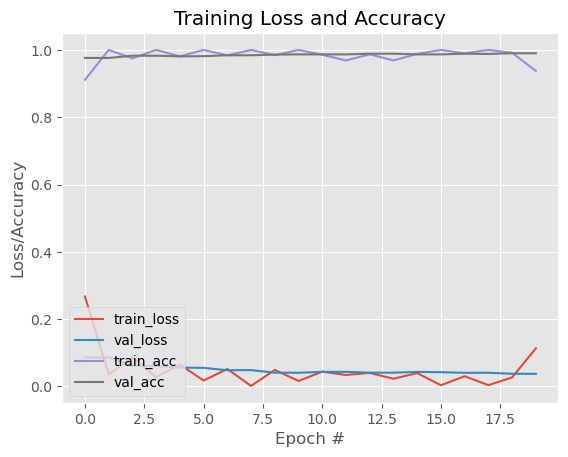

In [24]:
#plot the training loss and  accuracy 

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")